In [51]:
import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('housepricedata.csv')

In [54]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [34]:
dataset = df.values

In [35]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [36]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [37]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [38]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [41]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [42]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [45]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 64ms/step - loss: 0.6703 - accuracy: 0.4971 - val_loss: 0.6730 - val_accuracy: 0.4658
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.6661 - accuracy: 0.5020 - val_loss: 0.6687 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.5382 - val_loss: 0.6643 - val_accuracy: 0.5662
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6578 - accuracy: 0.6331 - val_loss: 0.6595 - val_accuracy: 0.6301
Epoch 5/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6531 - accuracy: 0.7016 - val_loss: 0.6544 - val_accuracy: 0.7032
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6478 - accuracy: 0.7162 - val_loss: 0.6490 - val_accuracy: 0.7169
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6428 - accuracy: 0.7436 - val_loss: 0.6443 - val_accuracy: 0.7306
Epoch 8/1

In [47]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8904


0.8904109597206116

In [48]:
import matplotlib.pyplot as plt

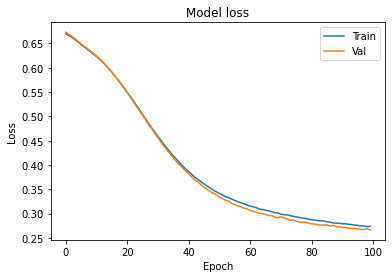

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

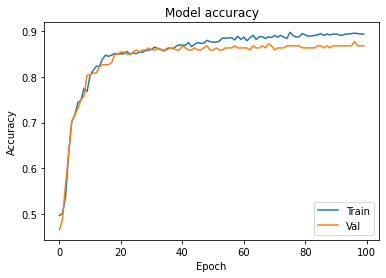

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()